In [13]:
# On importe la librairie et on utilise que la fonction pyplot

import matplotlib.pyplot as pyplot

# Pour utiliser une API en ligne

import requests
import json

In [14]:
# On initialise les listes qui contiendront nos données X et Y
x_value = []
y_value = []

In [15]:
# On exécute la requête API
response = requests.get("https://opendata.paris.fr/api/records/1.0/search/?dataset=subventions-accordees-et-refusees&q=&rows=14&facet=annee_budgetaire&facet=collectivite&facet=nom_beneficiaire&facet=direction&facet=nature_de_la_subvention&facet=secteurs_d_activites_definies_par_l_association&refine.annee_budgetaire=2020&exclude.montant_vote=0")
# On récupère la donnée JSON de la réponse de l'API
data = response.json()

In [16]:
# On fait une boucle FOR pour récupérer une à une les différentes données de notre JSON
# La limite de notre FOR correspond à la longueur de l'objet JSON qu'on reçoit
for i in range(len(data['records'])):
    # On récupère la donnée pour la date
    # La date sera affichée en abscisse
    x = data['records'][i]['fields']['nom_beneficiaire']

    # On récupère la donnée pour l'effectif
    # Le nombre sera affiché en ordonnée
    y = data['records'][i]['fields']['montant_vote']

    x_value.append(x)
    y_value.append(y)

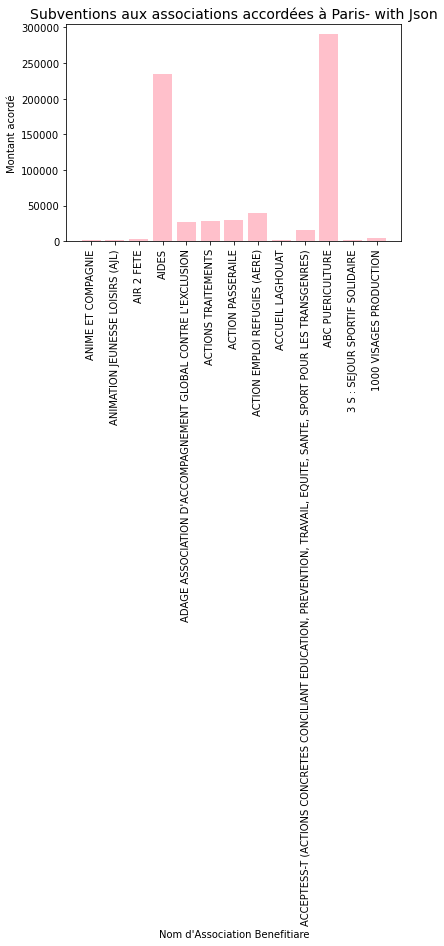

In [17]:
# On configure le chart

pyplot.bar(x_value, y_value, color = "pink", width = 0.8)
pyplot.gca().invert_xaxis() # Ordre croissant de date
pyplot.xticks(rotation='vertical') # Retourner les labels
pyplot.xlabel("Nom d'Association Benefitiare") # Légende à X
pyplot.ylabel("Montant acordé") # Légende pour Y

# On ajoute un titre et on modifie sa taille
titre = pyplot.title('Subventions aux associations accordées à Paris- with Json')
titre.set_fontsize(14)

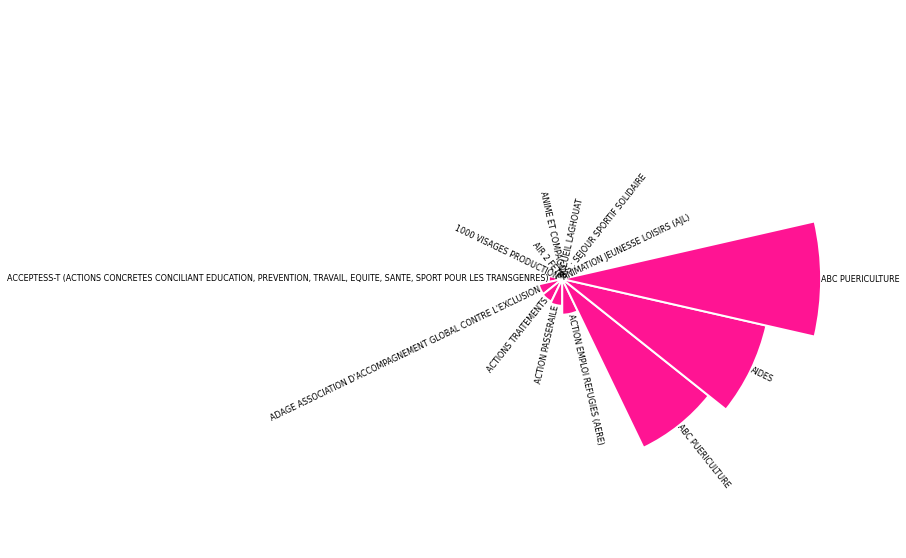

In [18]:
import matplotlib.pyplot as plt
import json
import numpy as np
import pandas as pd


# On ouvre le fichier JSON

# On ouvre le fichier JSON
f = open('subventions.json',)

# On récupère le JSON en dictionnaire
data = json.load(f)

# On ferme le document 
f.close()

# Build a dataset
df = pd.DataFrame(
        {
            "montant_vote": y_value,
            'nom_beneficiaire':  x_value
        })

# Reorder the dataframe
df = df.sort_values(by=['montant_vote'])

# initialize the figure
plt.figure(figsize=(20,10))
ax = plt.subplot(111, polar=True)
plt.axis('off')

# Constants = parameters controling the plot layout:
upperLimit = 100
lowerLimit = 30
labelPadding = 4

# Compute max and min in the dataset
max = df['montant_vote'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * df.montant_vote + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(df.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(df.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
    color="#ff1493",
)

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, df["nom_beneficiaire"]):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor",
        size=8) 


plt.show()